In [1]:
import os
import asyncio
import numpy as np
import face_recognition
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from EmoPy.src.fermodel import FERModel
from pkg_resources import resource_filename

Using TensorFlow backend.


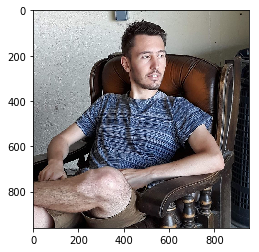

In [5]:
img = "louis.jpg"
plt.imshow(mpimg.imread(img))

In [6]:
def main():
  # Load the jpg file into a numpy array
  image = face_recognition.load_image_file(img)

  # Find all the faces in the image using a pre-trained convolutional neural network.
  # This method is more accurate than the default HOG model, but it's slower
  # unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
  # this will use GPU acceleration and perform well.
  # See also: find_faces_in_picture.py
  face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

  print("I found {} face(s) in this photograph.".format(len(face_locations)))

  for face_location in face_locations:

      # Print the location of each face in this image
      top, right, bottom, left = face_location
      print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

      # You can access the actual face itself like this:
      face_image = image[top:bottom, left:right]
      result = Image.fromarray((face_image * 255).astype(np.uint8))
      result.save("face_image.png", "PNG")
      target_emotions = ['calm', 'anger', 'happiness']
      model = FERModel(target_emotions, verbose=True)
      model.predict("face_image.png")

      #pil_image = Image.fromarray(face_image)
      #plt.imshow(Image.fromarray(face_image))

In [7]:
main()

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 148, Left: 440, Bottom: 312, Right: 604
Initializing FER model parameters for target emotions: ['calm', 'anger', 'happiness']
anger: 49.5%
calm: 11.1%
happiness: 39.3%
Dominant emotion: anger

